# DARNN experiments.

Import dependencies.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from torch import nn

from preprocessors.preprocessor import Preprocessor

from preprocessors.scalers.min_max_scaler import MinMaxScalerData
from preprocessors.scalers.log_increases_scaler import LogIncreasesScalerData

from models.darnn.darnn import DARNN

from preprocessors.extrapolate_functions import *

from utils import mape, rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr as pearson

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = "../data/RUB_1997.csv"
train_size = 7475
val_size = 551
max_train_horizons = 42
max_prediction_horizons = 28
d_size = 4

In [3]:
df = pd.read_csv(DATA_PATH)

Let's get a small glipse on the data. RUBLE is the target column, information form Date column is not obtained during training.

In [4]:
df.head(-1)

,RUB CBRF Curncy,EUCRBRDT Comdty,EURUSD Curncy,Date
0,5.5540,24.37,1.2713,1/2/97
1,5.5540,24.27,1.2577,1/3/97
2,5.5540,24.27,1.2577,1/4/97
3,5.5540,24.27,1.2577,1/5/97
4,5.5540,24.73,1.2516,1/6/97
...,...,...,...,...
8520,72.7263,23.46,1.0981,5/1/20
8521,72.7263,23.46,1.0981,5/2/20
8522,72.7263,23.46,1.0981,5/3/20
8523,72.7263,24.75,1.0907,5/4/20


Let's try to use MinMaxScalerData with linear piecewise extrapolation to see, what happens.

In [5]:
scaler=MinMaxScalerData(train_size=train_size)

preprocessor = Preprocessor(
    dataset=df.to_numpy(),
    max_pred_horizon=max_prediction_horizons,
    max_train_horizon=max_train_horizons,
    d_size=d_size,
    extrapolator_x=x_flat_piecewise,
    extrapolator_y=y_flat_piecewise,
)

Using cpu


In [6]:
preprocessor.train_val_test_split(
    train_size=train_size,
    val_size=val_size,
    scaler=scaler,
    use_tqdm=True,
)

100%|██████████| 429/429 [00:00<00:00, 6039.61it/s]


In [7]:
test_size = preprocessor.x_test.shape[0]

print('Test size:', test_size)

Test size: 430


Check the plot for each row.

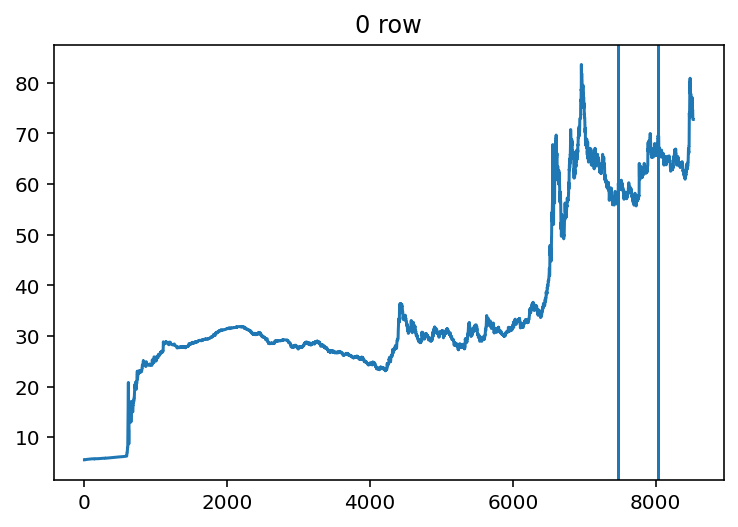

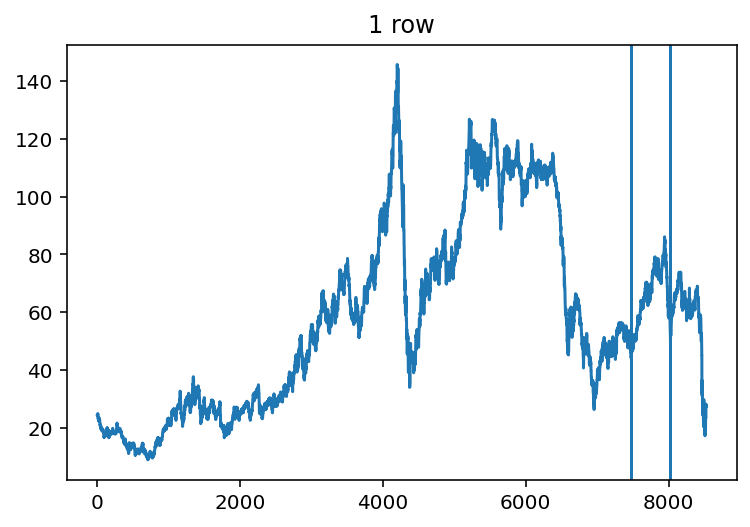

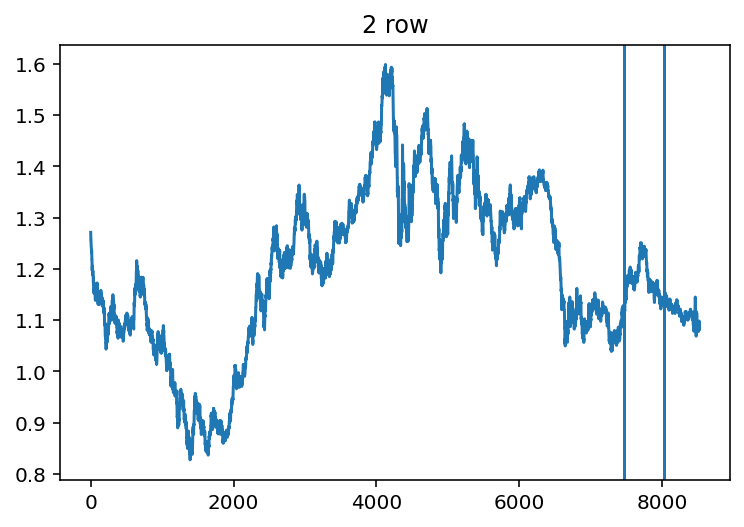

In [8]:
for row_ind in range(d_size - 1):
    preprocessor.plot_row(row=row_ind)

Let's try to predict MEAN. We will use MSELoss, train_horizon=14, pred_horizon=7.

In [9]:
model_mean = DARNN(
    preprocessor=preprocessor,
    out_features=1,
    encoder_input_size=2,
    loss_function=nn.MSELoss(),
    metrics={
        'MAE': mean_absolute_error,
        'RMSE': rmse,
        'MAPE': mape,
        'Pearson': pearson,
    },
    target_function=lambda x: np.mean(x, axis=-1),
    encoder_hidden_size=64,
    decoder_hidden_size=64,
    train_horizon=14,
    pred_horizon=7,
    learning_rate=0.001,
    plot_frequency = 5,
    path_to_save_weights='./',
)

Let's try to run over 200 epochs to see what happens. We will also count all metrics on real (not scaled) data.

Epoch: 0 Epoch loss: 0.014386234804987907
Better model with geom mean metrics 3.9170910058098345 found
Metrics: {'MAE': 6.784406683340229, 'RMSE': 6.93778895963557, 'MAPE': 10.449828104822377, 'Pearson': -0.6811718804251031}
Model has been saved in ./


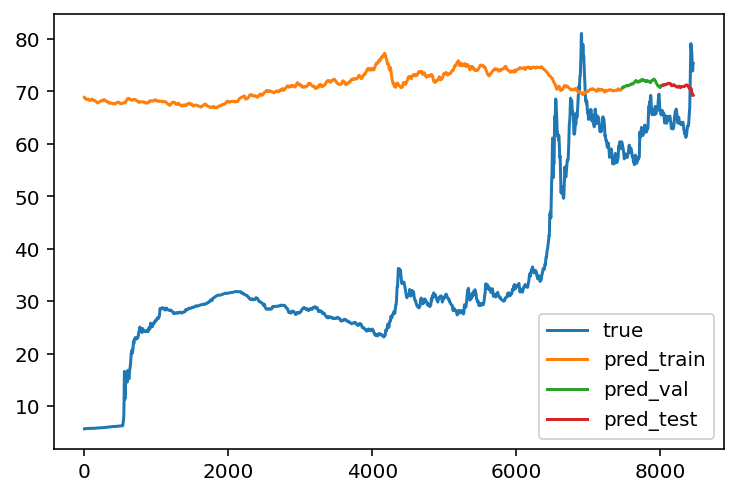

Epoch: 1 Epoch loss: 0.07233872264623642
Epoch: 2 Epoch loss: 0.03989329934120178
Epoch: 3 Epoch loss: 0.038079943507909775
Epoch: 4 Epoch loss: 0.03763451427221298
Epoch: 5 Epoch loss: 0.0379762277007103


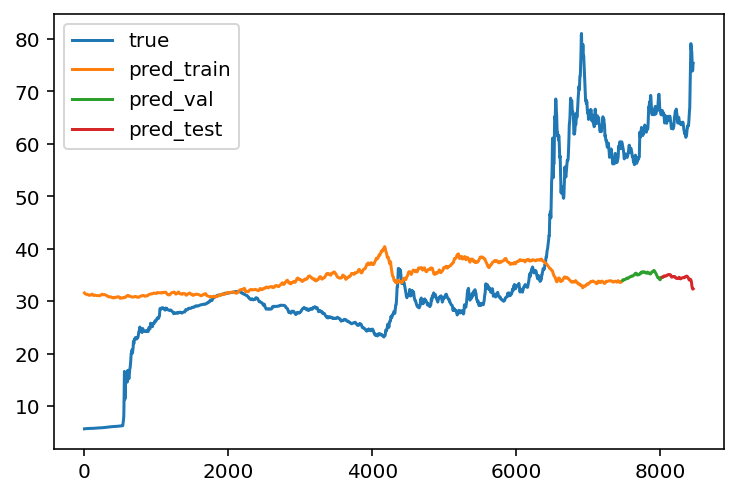

Epoch: 6 Epoch loss: 0.03729165717959404
Epoch: 7 Epoch loss: 0.038035206496715546
Epoch: 8 Epoch loss: 0.03592068701982498
Epoch: 9 Epoch loss: 0.03900608420372009
Epoch: 10 Epoch loss: 0.03648623824119568


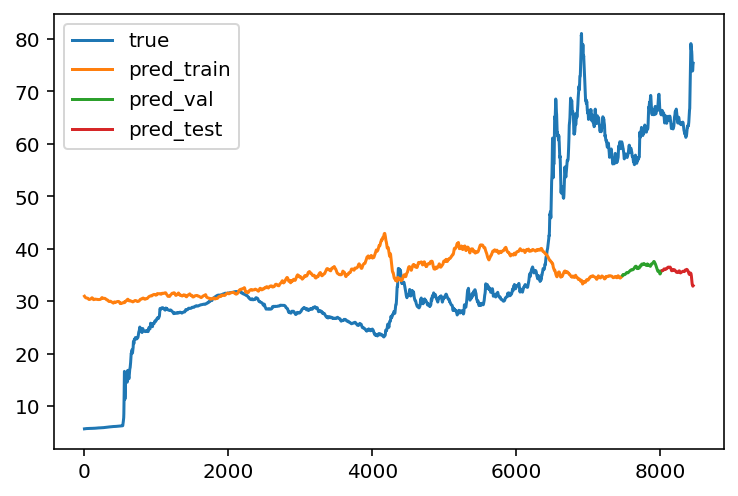

Epoch: 11 Epoch loss: 0.03871193900704384
Epoch: 12 Epoch loss: 0.03609474003314972
Epoch: 13 Epoch loss: 0.03661442920565605
Epoch: 14 Epoch loss: 0.03581622615456581
Epoch: 15 Epoch loss: 0.03564167767763138


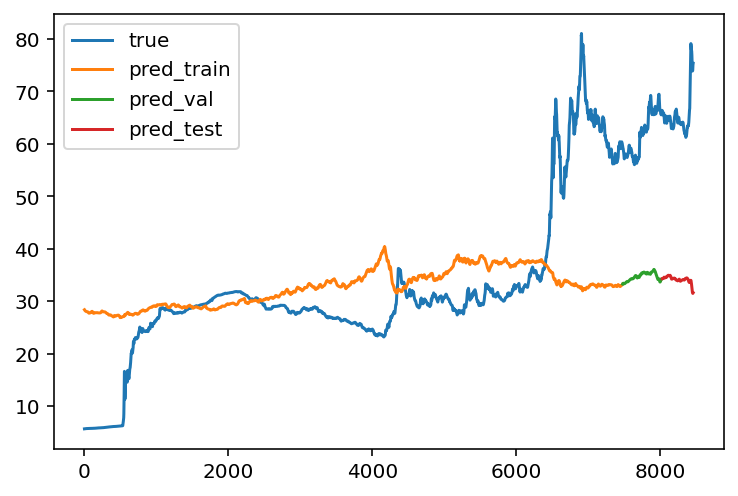

Epoch: 16 Epoch loss: 0.03519941866397858
Epoch: 17 Epoch loss: 0.03501260280609131
Epoch: 18 Epoch loss: 0.03449731320142746
Epoch: 19 Epoch loss: 0.034366872161626816
Epoch: 20 Epoch loss: 0.033580489456653595


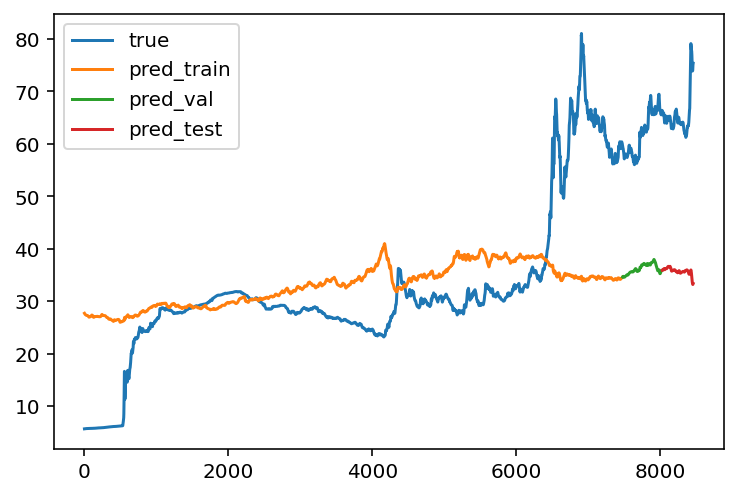

Epoch: 21 Epoch loss: 0.03383403271436691
Epoch: 22 Epoch loss: 0.03208749368786812
Epoch: 23 Epoch loss: 0.03379032388329506
Epoch: 24 Epoch loss: 0.030105117708444595
Epoch: 25 Epoch loss: 0.03397538512945175


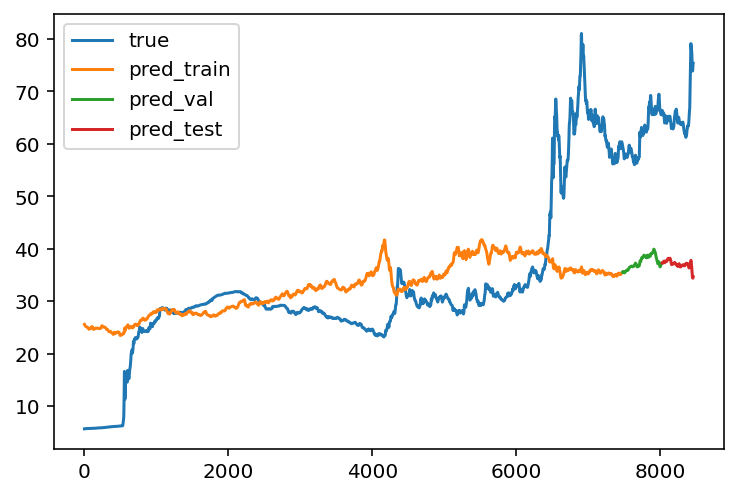

Epoch: 26 Epoch loss: 0.029605351388454437
Epoch: 27 Epoch loss: 0.031967341899871826
Epoch: 28 Epoch loss: 0.028426649048924446
Epoch: 29 Epoch loss: 0.02870221994817257
Epoch: 30 Epoch loss: 0.02605414018034935


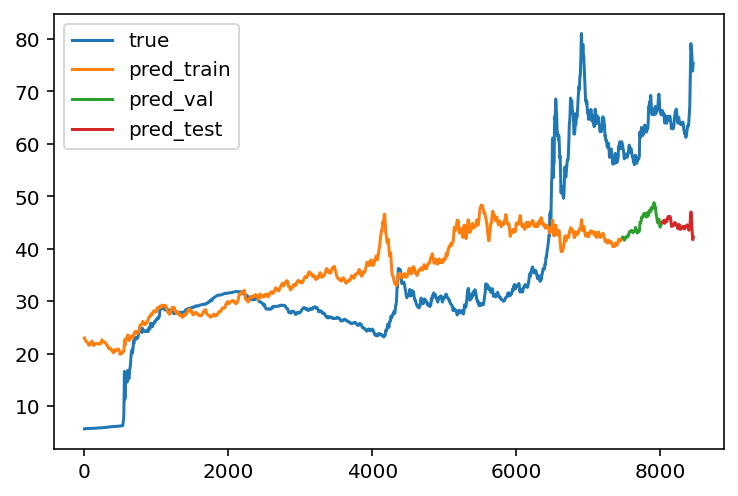

Epoch: 31 Epoch loss: 0.02433890476822853
Epoch: 32 Epoch loss: 0.021733006462454796
Epoch: 33 Epoch loss: 0.02006848342716694
Better model with geom mean metrics 2.467771895312199 found
Metrics: {'MAE': 7.377893198339988, 'RMSE': 8.113503588065283, 'MAPE': 11.07094307926803, 'Pearson': 0.4737896994343431}
Model has been saved in ./
Epoch: 34 Epoch loss: 0.01788620837032795
Epoch: 35 Epoch loss: 0.01962416246533394
Better model with geom mean metrics 1.823432872917211 found
Metrics: {'MAE': 6.075940063546541, 'RMSE': 6.904674655491115, 'MAPE': 9.114343586327157, 'Pearson': 0.5327231179904327}
Model has been saved in ./


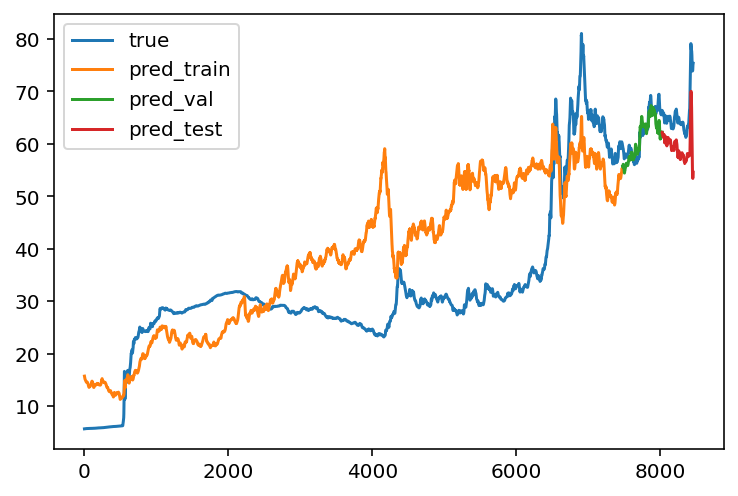

Epoch: 36 Epoch loss: 0.018615588545799255
Epoch: 37 Epoch loss: 0.0248905997723341
Epoch: 38 Epoch loss: 0.025159232318401337
Epoch: 39 Epoch loss: 0.0235272403806448
Epoch: 40 Epoch loss: 0.017604166641831398


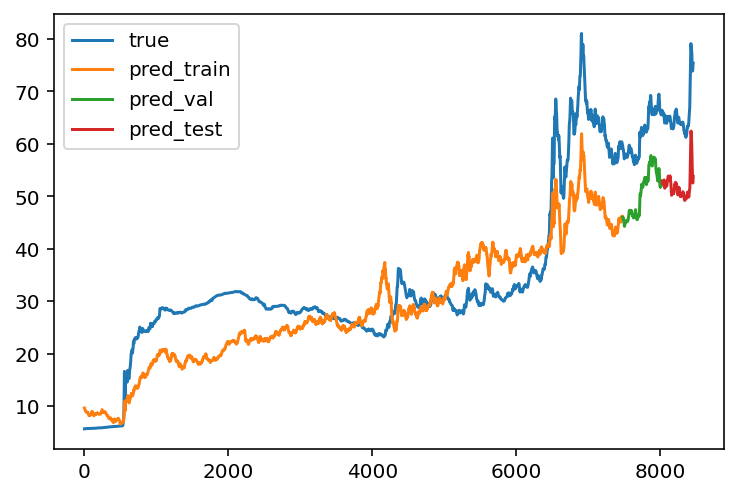

Epoch: 41 Epoch loss: 0.010391926392912865
Epoch: 42 Epoch loss: 0.004659970756620169
Epoch: 43 Epoch loss: 0.007707883603870869
Epoch: 44 Epoch loss: 0.009279569610953331
Epoch: 45 Epoch loss: 0.0028812072705477476


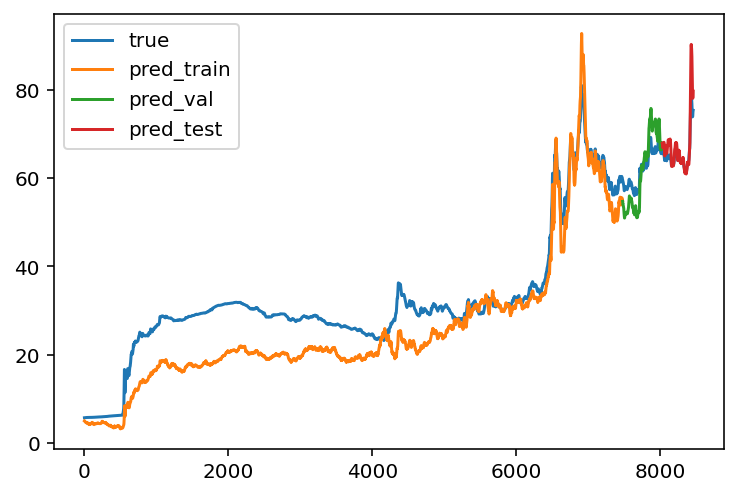

Epoch: 46 Epoch loss: 0.0035189627669751644
Epoch: 47 Epoch loss: 0.002318208571523428
Epoch: 48 Epoch loss: 0.002343089785426855
Better model with geom mean metrics 1.7618222572925322 found
Metrics: {'MAE': 1.0110818391192726, 'RMSE': 1.6833462705875561, 'MAPE': 1.4625998064564643, 'Pearson': 0.9868044418154526}
Model has been saved in ./
Epoch: 49 Epoch loss: 0.002123525831848383
Epoch: 50 Epoch loss: 0.0015105640050023794
Better model with geom mean metrics 1.6710333378907913 found
Metrics: {'MAE': 0.6808618441659331, 'RMSE': 0.9709507624001773, 'MAPE': 1.0052540680007547, 'Pearson': 0.9867044536501359}
Model has been saved in ./


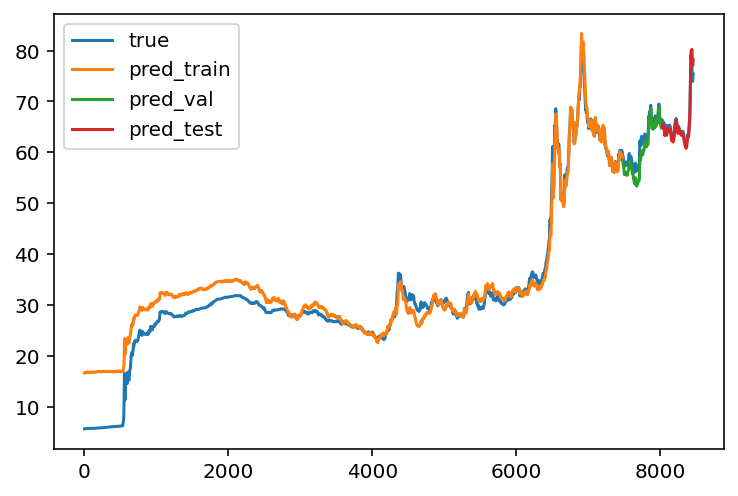

Epoch: 51 Epoch loss: 0.0022324840538203716
Epoch: 52 Epoch loss: 0.001065306132659316
Epoch: 53 Epoch loss: 0.001323681091889739
Epoch: 54 Epoch loss: 0.0011333151487633586
Epoch: 55 Epoch loss: 0.0009173824219033122
Better model with geom mean metrics 1.5796314707296573 found
Metrics: {'MAE': 1.0065762553310917, 'RMSE': 1.0961456443554993, 'MAPE': 1.5322233625767392, 'Pearson': 0.9924620301100714}
Model has been saved in ./


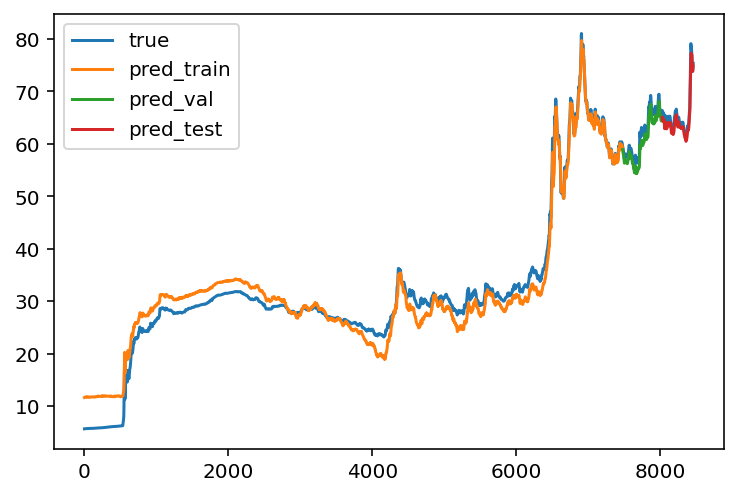

Epoch: 56 Epoch loss: 0.0008100155973806977
Better model with geom mean metrics 1.3896861072021784 found
Metrics: {'MAE': 0.8772387091575178, 'RMSE': 0.9869381389615755, 'MAPE': 1.3274140586696779, 'Pearson': 0.9933559711996108}
Model has been saved in ./
Epoch: 57 Epoch loss: 0.0006610521231777966
Better model with geom mean metrics 1.203638211632899 found
Metrics: {'MAE': 0.7482938418323445, 'RMSE': 0.8880216662516314, 'MAPE': 1.1240035634110397, 'Pearson': 0.9940614126622912}
Model has been saved in ./
Epoch: 58 Epoch loss: 0.0005417244392447174
Better model with geom mean metrics 1.0281282183110563 found
Metrics: {'MAE': 0.6214332980621066, 'RMSE': 0.7967506449260812, 'MAPE': 0.9252238782371565, 'Pearson': 0.9945809084469179}
Model has been saved in ./
Epoch: 59 Epoch loss: 0.0004417995805852115
Better model with geom mean metrics 0.878909640857712 found
Metrics: {'MAE': 0.5120917108891853, 'RMSE': 0.7198058508361408, 'MAPE': 0.7554908845300097, 'Pearson': 0.9949271253853105}
Model

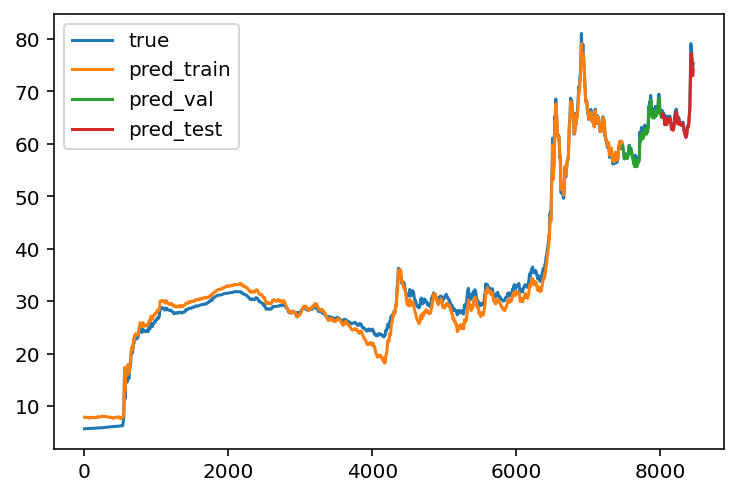

Epoch: 61 Epoch loss: 0.00028502949862740934
Better model with geom mean metrics 0.6728734519985738 found
Metrics: {'MAE': 0.3766995352368182, 'RMSE': 0.6124732460315672, 'MAPE': 0.5490446594352518, 'Pearson': 0.9952458537154107}
Model has been saved in ./
Epoch: 62 Epoch loss: 0.00022893724963068962
Better model with geom mean metrics 0.603460553055175 found
Metrics: {'MAE': 0.33746816816209174, 'RMSE': 0.5774487274547209, 'MAPE': 0.4901944489591947, 'Pearson': 0.9953045676645259}
Model has been saved in ./
Epoch: 63 Epoch loss: 0.0001872394495876506
Better model with geom mean metrics 0.5455921727963662 found
Metrics: {'MAE': 0.3104290430669812, 'RMSE': 0.5497355499886522, 'MAPE': 0.4500154190467841, 'Pearson': 0.9953357324699101}
Model has been saved in ./
Epoch: 64 Epoch loss: 0.00015668192645534873
Better model with geom mean metrics 0.4908445456643808 found
Metrics: {'MAE': 0.29109292424185573, 'RMSE': 0.5257708262638343, 'MAPE': 0.4217483324133834, 'Pearson': 0.9953513483244495}

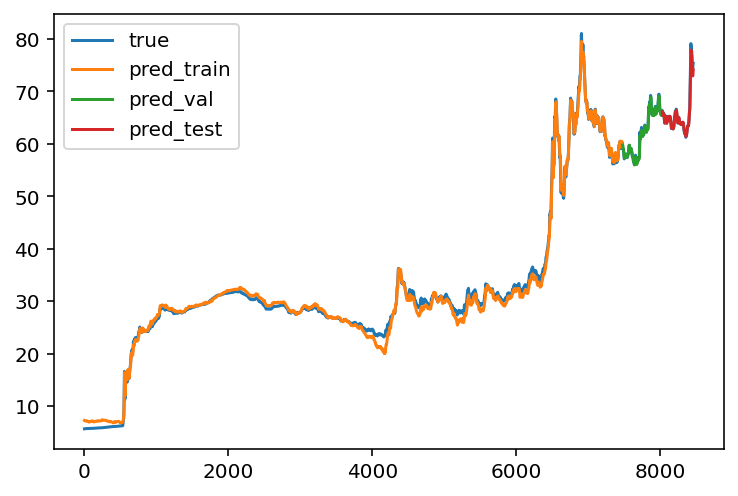

Epoch: 66 Epoch loss: 0.00011704819917213172
Better model with geom mean metrics 0.4053174090094197 found
Metrics: {'MAE': 0.27848303340808284, 'RMSE': 0.4898784506980732, 'MAPE': 0.40589584258901534, 'Pearson': 0.995347227776921}
Model has been saved in ./
Epoch: 67 Epoch loss: 0.00010378155275247991
Better model with geom mean metrics 0.3851313980578222 found
Metrics: {'MAE': 0.28220878043362463, 'RMSE': 0.4789766825264052, 'MAPE': 0.41361950810406467, 'Pearson': 0.9953291334844308}
Model has been saved in ./
Epoch: 68 Epoch loss: 9.352608321933076e-05
Better model with geom mean metrics 0.38501475894029397 found
Metrics: {'MAE': 0.29211873966482743, 'RMSE': 0.4727920828030616, 'MAPE': 0.4310479149765324, 'Pearson': 0.9953025212859739}
Model has been saved in ./
Epoch: 69 Epoch loss: 8.61094449646771e-05
Epoch: 70 Epoch loss: 8.108698239084333e-05


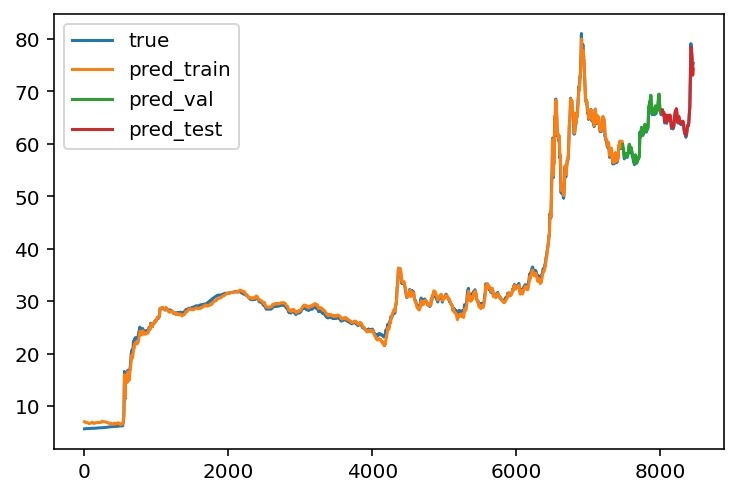

Epoch: 71 Epoch loss: 7.822963380021974e-05
Epoch: 72 Epoch loss: 7.7164797403384e-05
Epoch: 73 Epoch loss: 7.746081973891705e-05
Epoch: 74 Epoch loss: 7.900828495621681e-05
Epoch: 75 Epoch loss: 8.115473610814661e-05


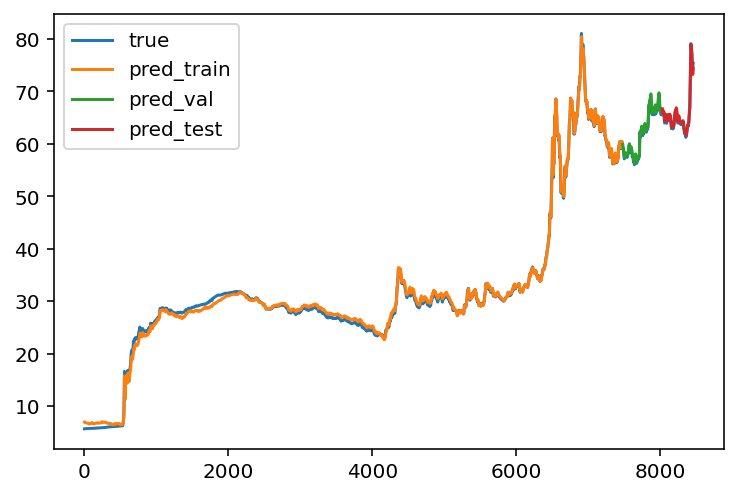

Epoch: 76 Epoch loss: 8.427695138379931e-05
Epoch: 77 Epoch loss: 8.738003816688433e-05
Epoch: 78 Epoch loss: 9.138824680121616e-05
Epoch: 79 Epoch loss: 9.504372428636998e-05
Epoch: 80 Epoch loss: 9.929169027600437e-05


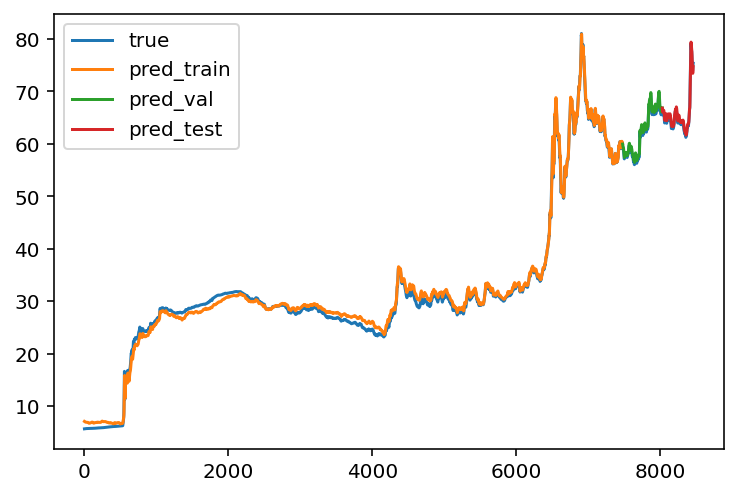

Epoch: 81 Epoch loss: 0.00010374682460678741
Epoch: 82 Epoch loss: 0.00010708691115723923
Epoch: 83 Epoch loss: 0.00011357190669514239
Epoch: 84 Epoch loss: 0.00011385460675228387
Epoch: 85 Epoch loss: 0.00012440767022781074


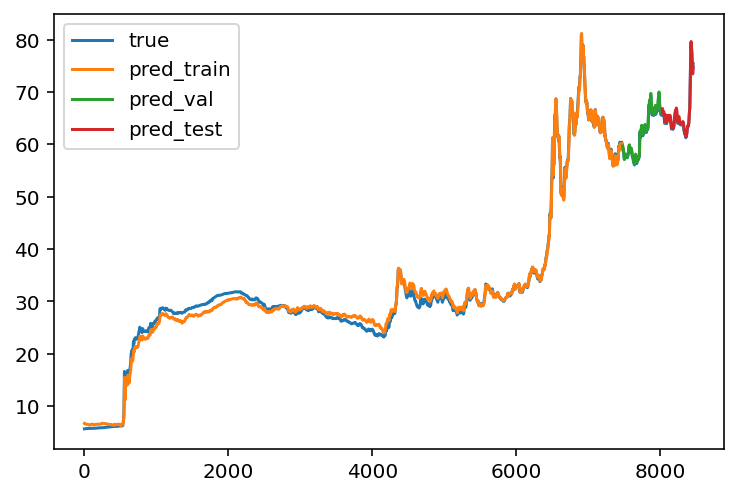

Epoch: 86 Epoch loss: 0.00011902013648068532
Epoch: 87 Epoch loss: 0.000134612200781703
Epoch: 88 Epoch loss: 0.0001231976639246568
Epoch: 89 Epoch loss: 0.00014096089580561966
Epoch: 90 Epoch loss: 0.00012790539767593145


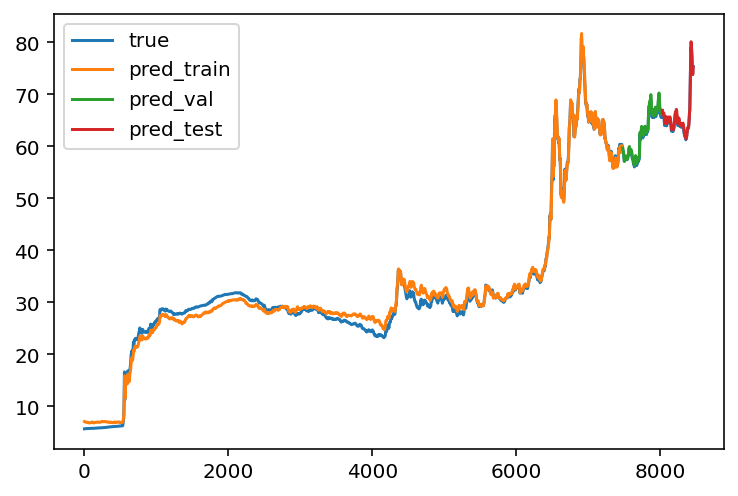

Epoch: 91 Epoch loss: 0.00014212631504051387
Epoch: 92 Epoch loss: 0.0001330330705968663
Epoch: 93 Epoch loss: 0.00014083751011639833
Epoch: 94 Epoch loss: 0.00013674497313331813
Epoch: 95 Epoch loss: 0.00014004757395014167


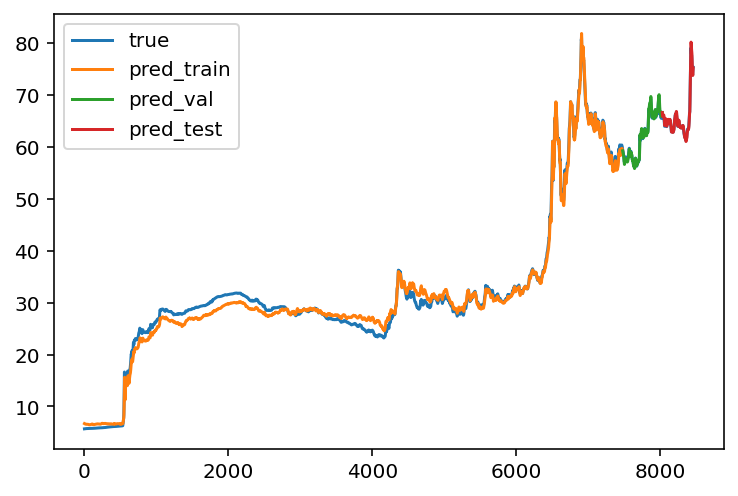

Epoch: 96 Epoch loss: 0.00013911582936998457
Epoch: 97 Epoch loss: 0.0001412018173141405
Epoch: 98 Epoch loss: 0.00014294612628873438
Epoch: 99 Epoch loss: 0.00014712089614477009
Epoch: 100 Epoch loss: 0.00015373264614026994


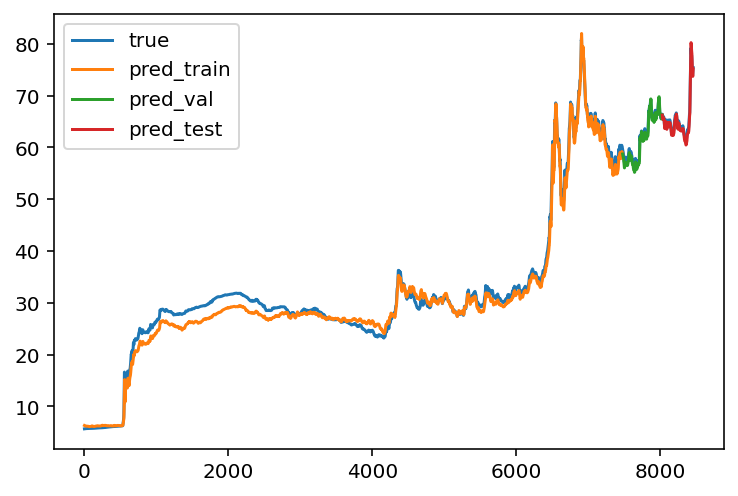

Epoch: 101 Epoch loss: 0.00016468223475385457
Epoch: 102 Epoch loss: 0.00018126600480172783
Epoch: 103 Epoch loss: 0.00020420663349796087
Epoch: 104 Epoch loss: 0.00023069461167324334
Epoch: 105 Epoch loss: 0.00025163881946355104


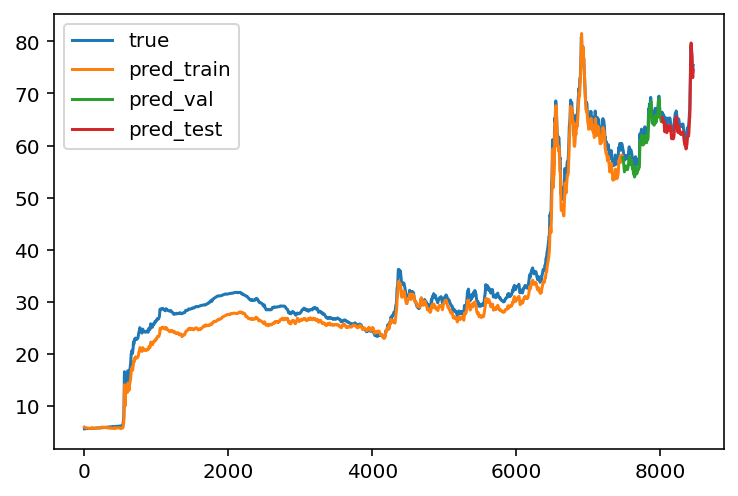

Epoch: 106 Epoch loss: 0.00025401462335139513
Epoch: 107 Epoch loss: 0.0002352767187403515
Epoch: 108 Epoch loss: 0.00021666298562195152
Epoch: 109 Epoch loss: 0.00022713014914188534
Epoch: 110 Epoch loss: 0.0002705970546230674


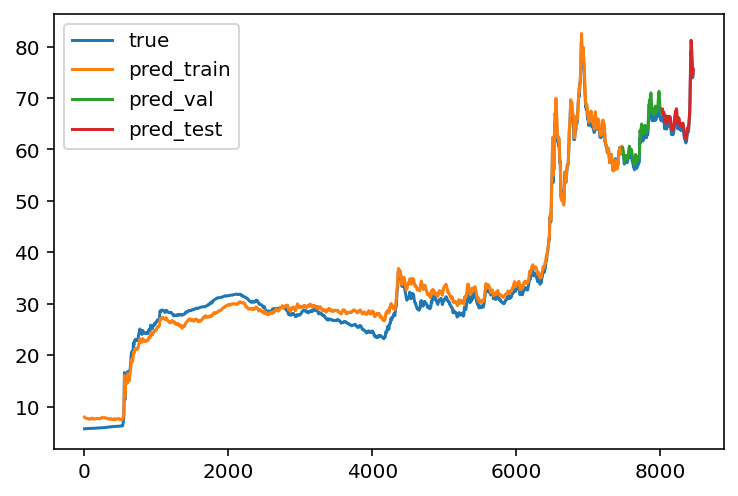

Epoch: 111 Epoch loss: 0.00032261357409879565
Epoch: 112 Epoch loss: 0.00035686834598891437
Epoch: 113 Epoch loss: 0.00037261276156641543
Epoch: 114 Epoch loss: 0.0003557874006219208
Epoch: 115 Epoch loss: 0.00028895866125822067


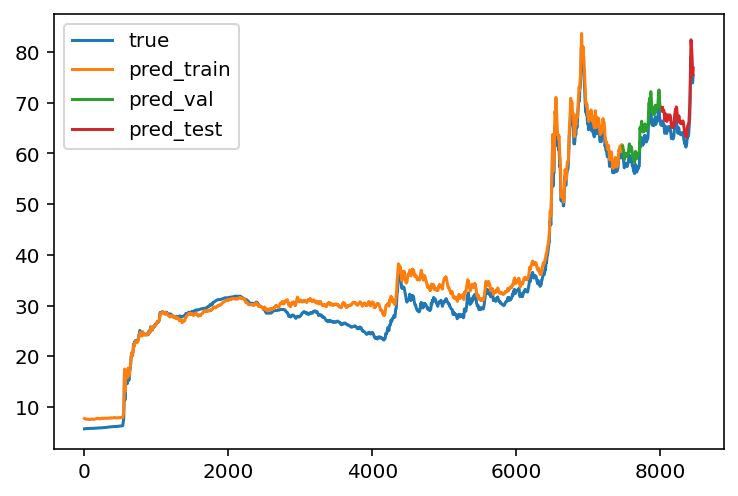

Epoch: 116 Epoch loss: 0.00025541248032823205
Epoch: 117 Epoch loss: 0.00022162678942549974
Epoch: 118 Epoch loss: 0.0002128055493813008
Epoch: 119 Epoch loss: 0.0002664975181687623
Epoch: 120 Epoch loss: 0.0007162233232520521


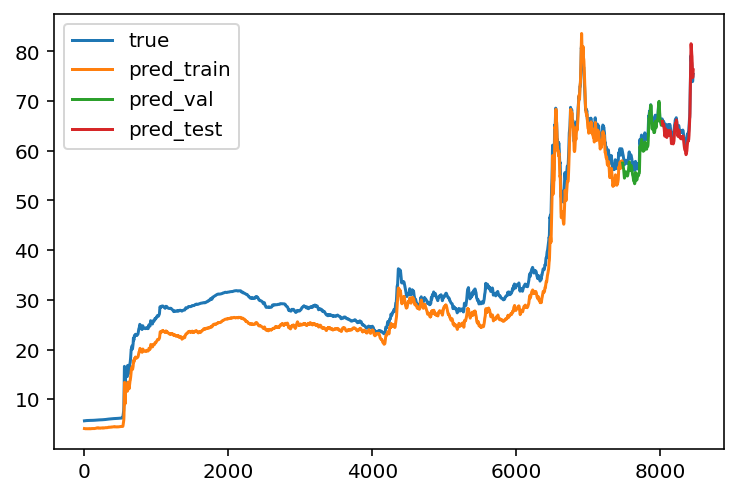

Epoch: 121 Epoch loss: 0.0016692359931766987
Epoch: 122 Epoch loss: 0.001127999392338097
Epoch: 123 Epoch loss: 0.000579866929911077
Epoch: 124 Epoch loss: 0.0011138970730826259
Epoch: 125 Epoch loss: 0.00046978864702396095


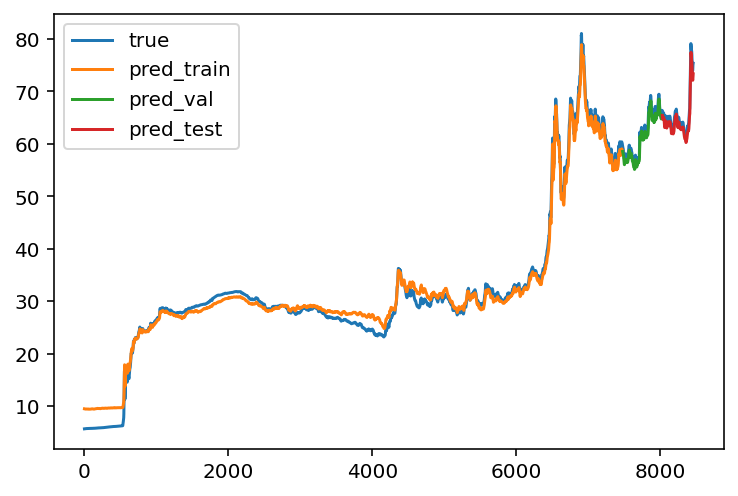

Epoch: 126 Epoch loss: 0.0004484003584366292
Epoch: 127 Epoch loss: 0.00020686913921963423
Epoch: 128 Epoch loss: 0.00012889473873656243
Epoch: 129 Epoch loss: 0.00012182511272840202
Epoch: 130 Epoch loss: 0.00011653351975837722


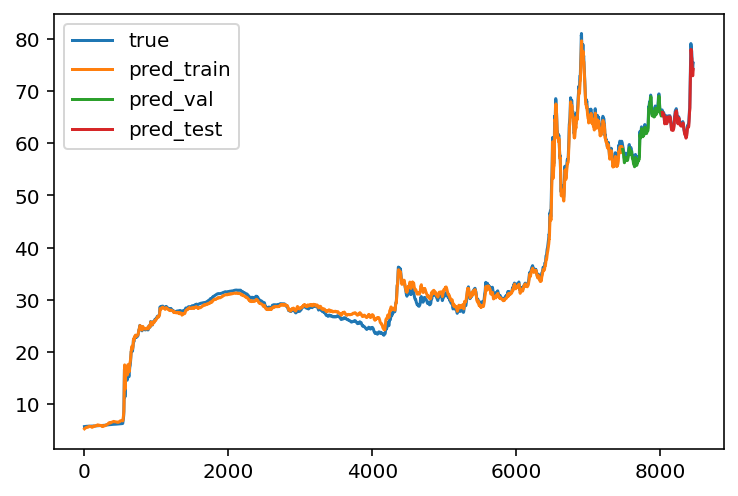

Epoch: 131 Epoch loss: 0.00010619954991852865
Epoch: 132 Epoch loss: 0.00010374026896897703
Epoch: 133 Epoch loss: 0.00010754880349850282
Epoch: 134 Epoch loss: 0.00010480800119694322
Epoch: 135 Epoch loss: 9.295913332607597e-05


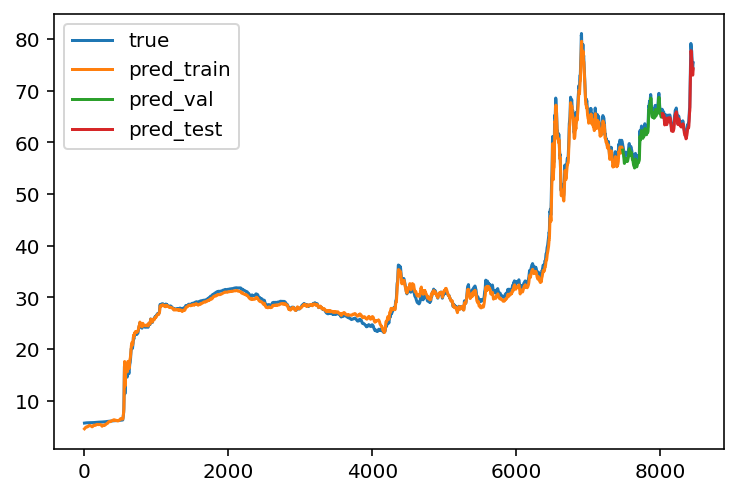

Epoch: 136 Epoch loss: 8.916764636524022e-05
Epoch: 137 Epoch loss: 8.940839325077832e-05
Epoch: 138 Epoch loss: 8.533407526556402e-05
Epoch: 139 Epoch loss: 7.903327059466392e-05
Epoch: 140 Epoch loss: 7.589306915178895e-05


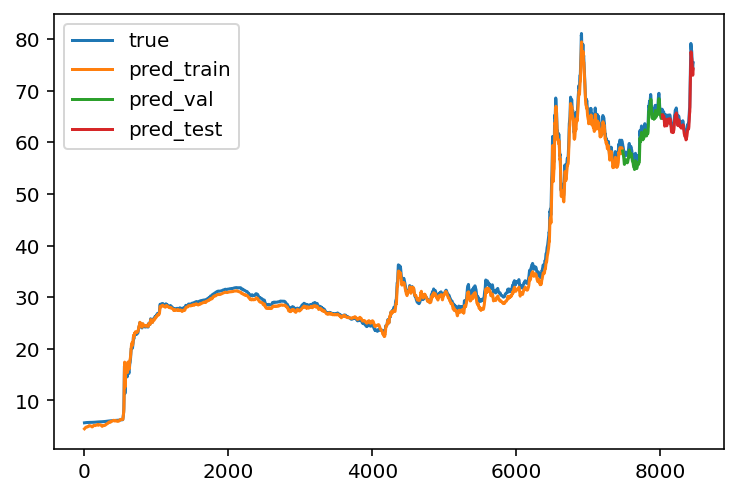

Epoch: 141 Epoch loss: 7.334256952162832e-05
Epoch: 142 Epoch loss: 7.04391859471798e-05
Epoch: 143 Epoch loss: 6.813339132349938e-05
Epoch: 144 Epoch loss: 6.657947960775346e-05
Epoch: 145 Epoch loss: 6.587671668967232e-05


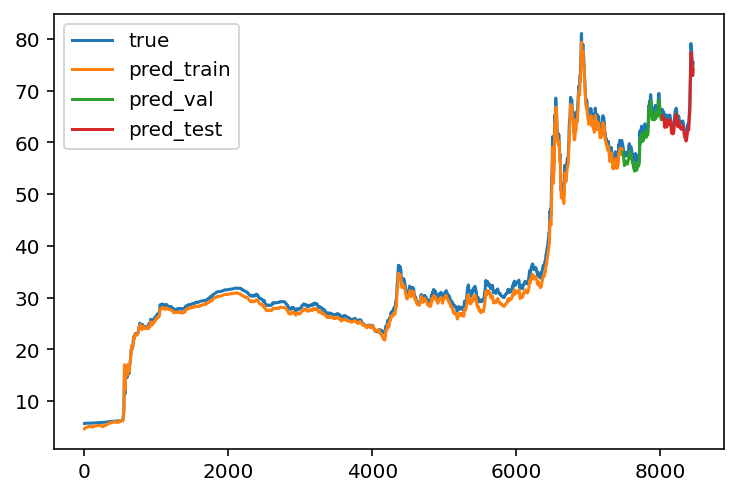

Epoch: 146 Epoch loss: 6.647830014117062e-05
Epoch: 147 Epoch loss: 6.89418229740113e-05
Epoch: 148 Epoch loss: 7.418285531457514e-05
Epoch: 149 Epoch loss: 8.361347136087716e-05
Epoch: 150 Epoch loss: 9.923258767230436e-05


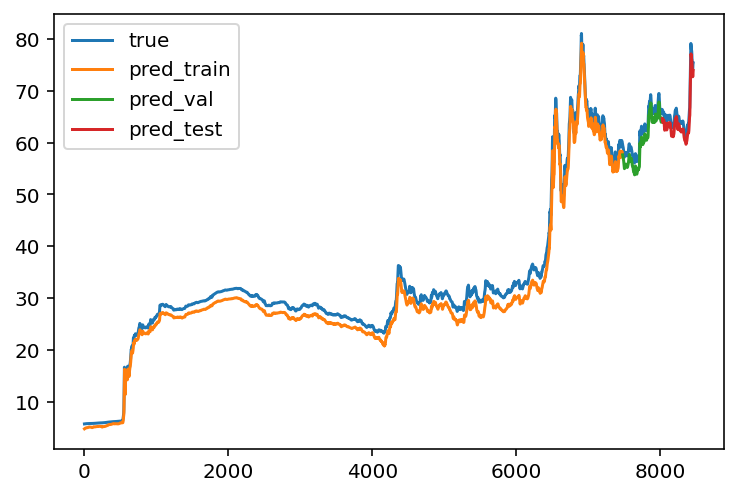

Epoch: 151 Epoch loss: 0.00012331787729635835
Epoch: 152 Epoch loss: 0.00015670020366087556
Epoch: 153 Epoch loss: 0.00019445207726676017
Epoch: 154 Epoch loss: 0.00022141738736536354
Epoch: 155 Epoch loss: 0.00021838028624188155


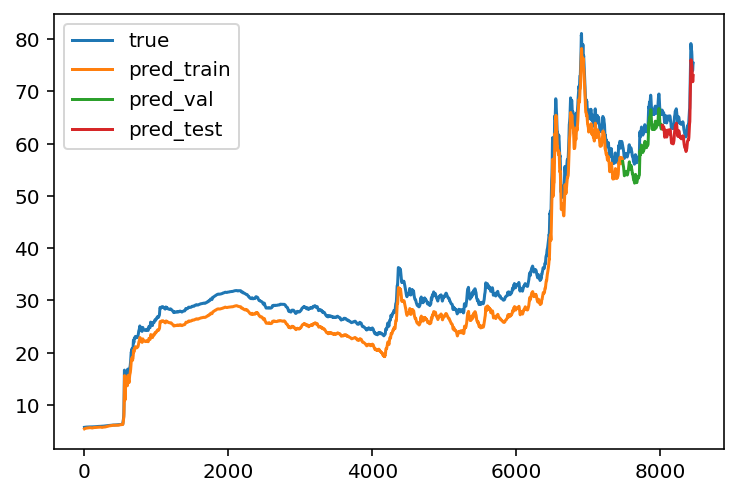

Epoch: 156 Epoch loss: 0.00018050875223707408
Epoch: 157 Epoch loss: 0.00012156613229308277
Epoch: 158 Epoch loss: 6.000030771247111e-05
Epoch: 159 Epoch loss: 2.2591502784052864e-05
Epoch: 160 Epoch loss: 4.288578566047363e-05


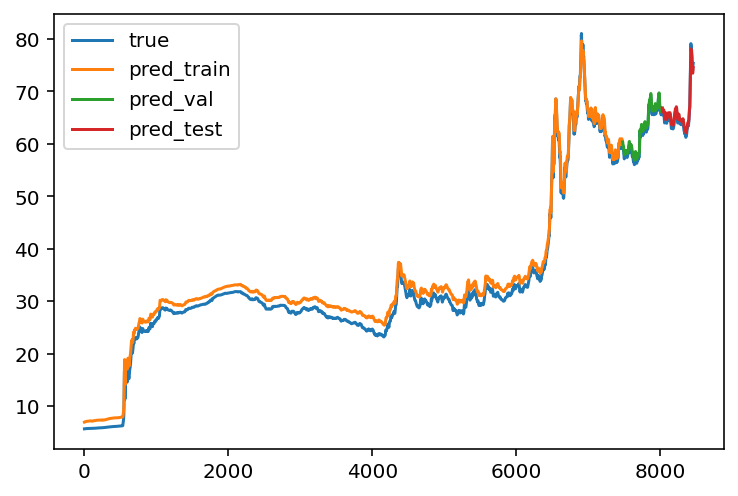

Epoch: 161 Epoch loss: 0.00014815757458563894
Epoch: 162 Epoch loss: 0.00025917188031598926
Epoch: 163 Epoch loss: 0.0002461231779307127
Epoch: 164 Epoch loss: 0.0002603533794172108
Epoch: 165 Epoch loss: 0.00028537376783788204


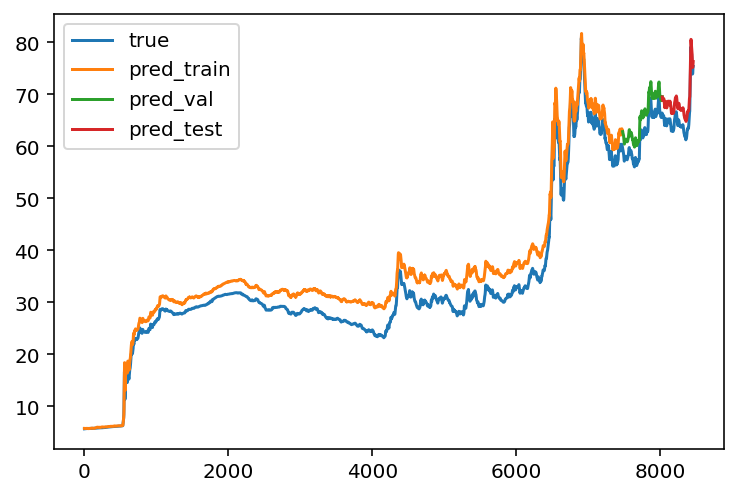

Epoch: 166 Epoch loss: 0.00024907782790251076
Epoch: 167 Epoch loss: 0.0002341557847103104
Epoch: 168 Epoch loss: 0.0001397605228703469
Epoch: 169 Epoch loss: 9.975281864171848e-05
Epoch: 170 Epoch loss: 5.879521995666437e-05


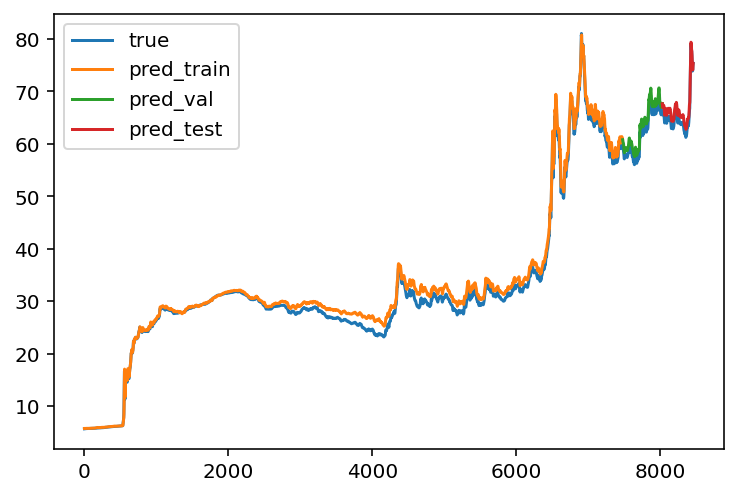

Epoch: 171 Epoch loss: 4.3294661736581475e-05
Epoch: 172 Epoch loss: 3.315853246022016e-05
Epoch: 173 Epoch loss: 2.4867000320227817e-05
Epoch: 174 Epoch loss: 2.1874508092878386e-05
Better model with geom mean metrics 0.37352719073995727 found
Metrics: {'MAE': 0.31889192539857003, 'RMSE': 0.3863708914559588, 'MAPE': 0.4833569528401605, 'Pearson': 0.9973192124127641}
Model has been saved in ./
Epoch: 175 Epoch loss: 2.1237992768874392e-05


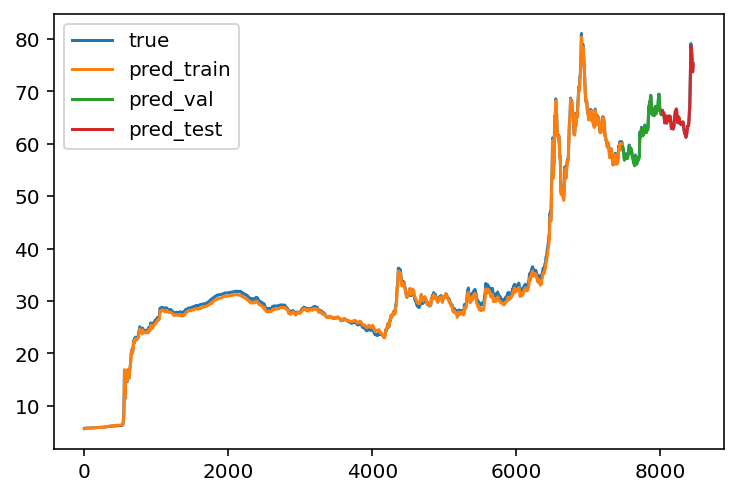

Epoch: 176 Epoch loss: 2.730849701038096e-05
Epoch: 177 Epoch loss: 4.898871702607721e-05
Epoch: 178 Epoch loss: 0.0001122392131946981
Epoch: 179 Epoch loss: 0.0002687220985535532
Epoch: 180 Epoch loss: 0.0005212638061493635


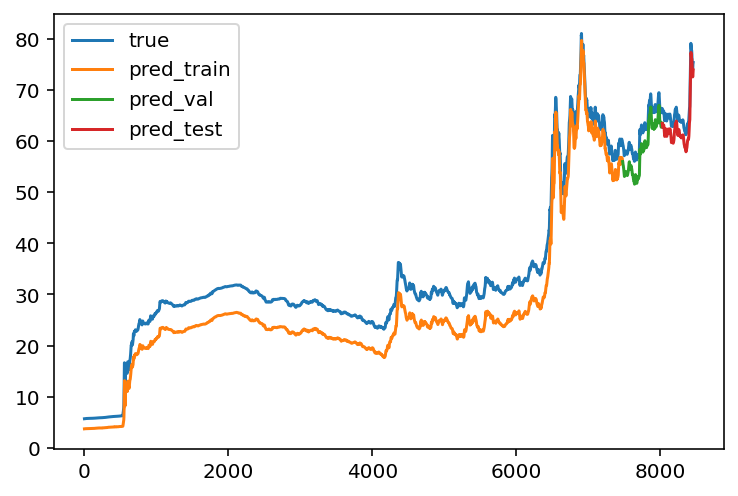

Epoch: 181 Epoch loss: 0.0006973149720579386
Epoch: 182 Epoch loss: 0.0003658571222331375
Epoch: 183 Epoch loss: 0.0005206660716794431
Epoch: 184 Epoch loss: 0.00014908720913808793
Epoch: 185 Epoch loss: 0.0006218104972504079


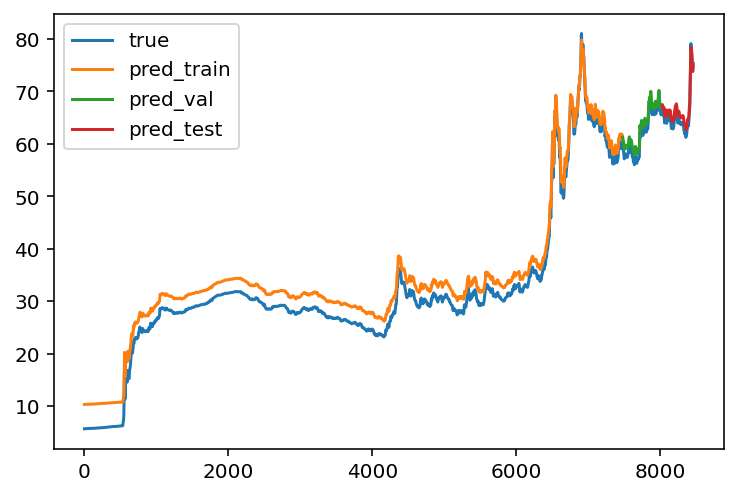

Epoch: 186 Epoch loss: 0.0003115023428108543
Epoch: 187 Epoch loss: 0.00010113924508914351
Epoch: 188 Epoch loss: 4.9210160796064883e-05
Better model with geom mean metrics 0.35859454712333516 found
Metrics: {'MAE': 0.31209347523488146, 'RMSE': 0.5162216685790009, 'MAPE': 0.4518594107038453, 'Pearson': 0.9974187356506746}
Model has been saved in ./
Epoch: 189 Epoch loss: 6.285229028435424e-05
Epoch: 190 Epoch loss: 0.00014802208170294762
Better model with geom mean metrics 0.31235936031895684 found
Metrics: {'MAE': 0.2441146031612413, 'RMSE': 0.45069713566640585, 'MAPE': 0.34971918873521657, 'Pearson': 0.9975187492254514}
Model has been saved in ./


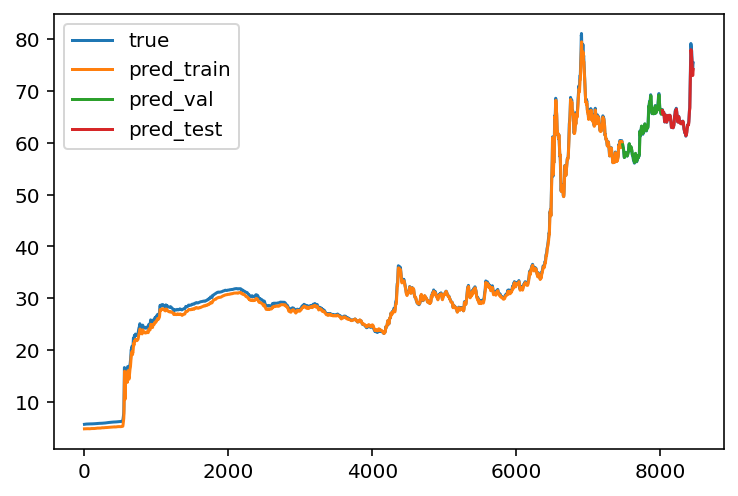

Epoch: 191 Epoch loss: 4.062415973749012e-05
Epoch: 192 Epoch loss: 7.117195491446182e-05
Epoch: 193 Epoch loss: 3.0284283639048226e-05
Epoch: 194 Epoch loss: 4.554913903120905e-05
Epoch: 195 Epoch loss: 2.298403524036985e-05


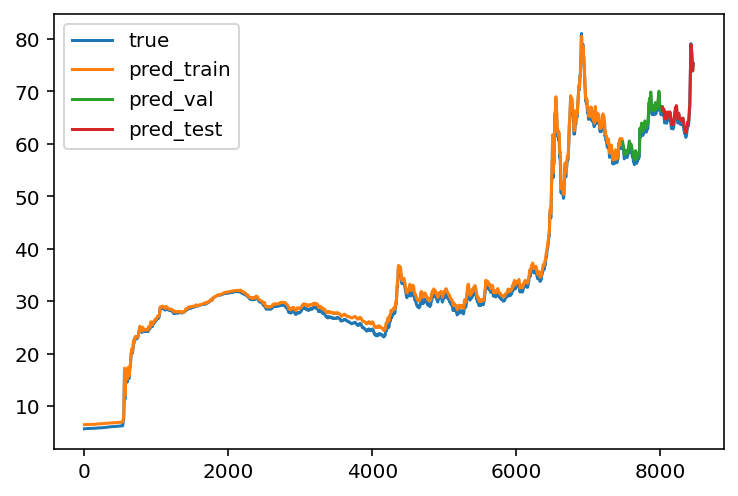

Epoch: 196 Epoch loss: 3.0624949431512505e-05
Epoch: 197 Epoch loss: 2.6230989533360116e-05
Epoch: 198 Epoch loss: 3.5002714867005125e-05
Epoch: 199 Epoch loss: 4.583201734931208e-05


In [10]:
model_mean.train(n_epochs=200, is_real_data=True)

Let's have a look on the result plot.

Weights have been loaded from ./


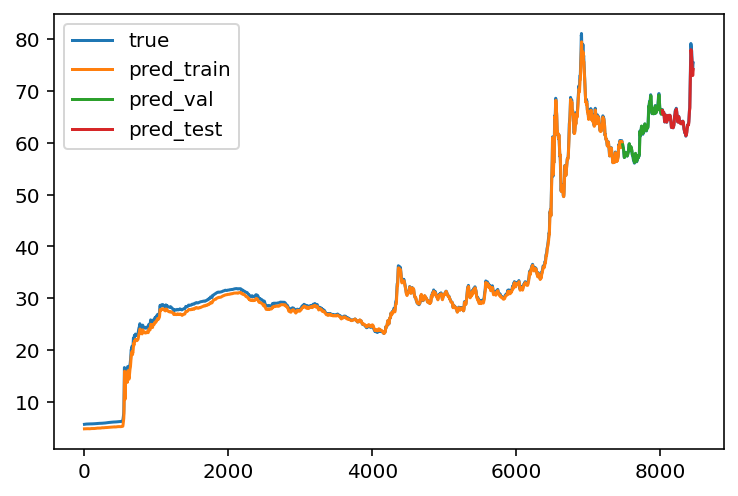

In [12]:
# Reload the best model.

model_mean_best = DARNN(
    preprocessor=preprocessor,
    out_features=1,
    encoder_input_size=2,
    loss_function=nn.MSELoss(),
    metrics={
        'MAE': mean_absolute_error,
        'RMSE': rmse,
        'MAPE': mape,
        'Pearson': pearson,
    },
    target_function=lambda x: np.mean(x, axis=-1),
    encoder_hidden_size=64,
    decoder_hidden_size=64,
    train_horizon=14,
    pred_horizon=7,
    path_to_load_weights='./',
)

model_mean_best.plot_union(is_real_data=True)

Seems fine. Let's try to predict prices on interval. Here we will try to predict values for 7 days based on 14 values.

In [13]:
model_multi = DARNN(
    preprocessor=preprocessor,
    out_features=7,
    encoder_input_size=2,
    loss_function=nn.MSELoss(),
    metrics={
        'MAE': mean_absolute_error,
        'RMSE': rmse,
        'MAPE': mape,
    },
    target_function=lambda x: x[:, :7],
    encoder_hidden_size=64,
    decoder_hidden_size=64,
    train_horizon=14,
    pred_horizon=7,
    learning_rate=0.001,
    plot_frequency = 5,
    path_to_save_weights='./',
)

Let's try to run over 200 epochs to see what happens. We will also count all metrics on real (not scaled) data.

In [14]:
model_multi.train(n_epochs=200, is_real_data=True)

Epoch: 0 Epoch loss: 0.017067449167370796
Better model with geom mean metrics 11.156290745927322 found
Metrics: {'MAE': 6.660526069298718, 'RMSE': 6.879526681090426, 'MAPE': 10.275055989602508}
Model has been saved in ./
Epoch: 1 Epoch loss: 0.047555044293403625
Better model with geom mean metrics 4.865053834318216 found
Metrics: {'MAE': 2.7252635062619333, 'RMSE': 3.660020387480797, 'MAPE': 4.03405897727222}
Model has been saved in ./
Epoch: 2 Epoch loss: 0.015130715444684029
Better model with geom mean metrics 4.621259467580379 found
Metrics: {'MAE': 4.223419443917844, 'RMSE': 4.382204702424034, 'MAPE': 6.525631086314446}
Model has been saved in ./
Epoch: 3 Epoch loss: 0.00552515871822834
Epoch: 4 Epoch loss: 0.002712672809138894
Better model with geom mean metrics 0.6021468498548358 found
Metrics: {'MAE': 0.7415877110478369, 'RMSE': 1.4172369015801742, 'MAPE': 1.0554339138266688}
Model has been saved in ./
Epoch: 5 Epoch loss: 0.0008485783473588526
Epoch: 6 Epoch loss: 0.00047094555

Epoch: 148 Epoch loss: 0.0004108482680749148
Epoch: 149 Epoch loss: 0.00026976963272318244
Epoch: 150 Epoch loss: 0.00026336658629588783
Epoch: 151 Epoch loss: 0.00013221257540863007
Epoch: 152 Epoch loss: 9.422867151442915e-05
Epoch: 153 Epoch loss: 3.546370498952456e-05
Better model with geom mean metrics 0.4352321292991567 found
Metrics: {'MAE': 0.3241213863115509, 'RMSE': 0.557774751916971, 'MAPE': 0.4801152849507606}
Model has been saved in ./
Epoch: 154 Epoch loss: 3.295063288533129e-05
Epoch: 155 Epoch loss: 2.8614083930733614e-05
Better model with geom mean metrics 0.42535805095253193 found
Metrics: {'MAE': 0.35379170278845884, 'RMSE': 0.5795525681694867, 'MAPE': 0.5239054521788505}
Model has been saved in ./
Epoch: 156 Epoch loss: 3.071673563681543e-05
Epoch: 157 Epoch loss: 3.171413118252531e-05
Epoch: 158 Epoch loss: 3.468296927167103e-05
Epoch: 159 Epoch loss: 3.888263745466247e-05
Epoch: 160 Epoch loss: 4.534898107522167e-05
Epoch: 161 Epoch loss: 5.423420589067973e-05
Epo

Let's have a look on the result plot on the index == 0 on test.

Weights have been loaded from ./


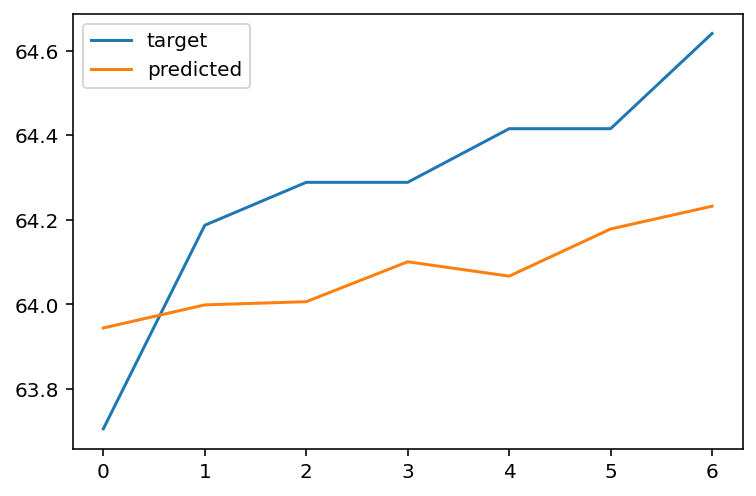

In [19]:
# Reload the best model.

model_multi_best = DARNN(
    preprocessor=preprocessor,
    out_features=7,
    encoder_input_size=2,
    loss_function=nn.MSELoss(),
    metrics={
        'MAE': mean_absolute_error,
        'RMSE': rmse,
        'MAPE': mape,
        'Pearson': pearson,
    },
    target_function=lambda x: x[:, :7],
    encoder_hidden_size=64,
    decoder_hidden_size=64,
    train_horizon=14,
    pred_horizon=7,
    path_to_load_weights='./',
)

model_multi_best.plot_multi(part='test', index=220, is_real_data=True)